In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
})

# Exe 1

In [2]:
# variance levels (tau^2)
tau2levels = np.linspace(.1,10,40)

# simulation parameters
samplesize = 200
numsamples =  20

# initialize results matrix
results = np.zeros((numsamples,len(tau2levels),2))

In [3]:
# run the experiment
# loop over tau levels
for ni,tau2 in enumerate(tau2levels):

  # repeat for multiple samples
  for sampi in range(numsamples):

    # generate sample data with tau modulation
    data = np.random.normal(0,np.sqrt(tau2),size=samplesize)

    # store sample mean and variance
    results[sampi,ni,0] = np.mean(data)
    results[sampi,ni,1] = np.var(data,ddof=1)

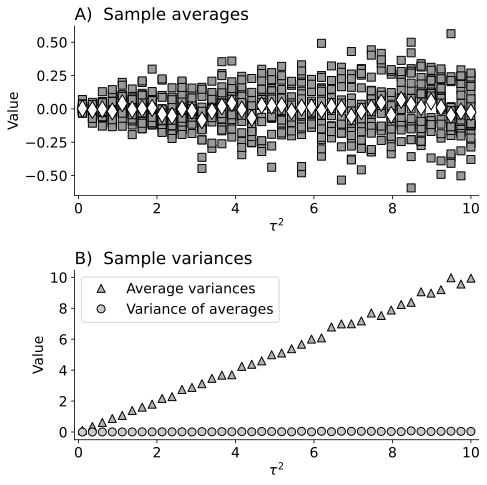

In [4]:
# plotting
_,axs = plt.subplots(2,1,figsize=(7,7))

# plot the average of the sample means
axs[0].plot(np.tile(tau2levels,(20,1)),results[:,:,0],'ks',
            markerfacecolor=(.6,.6,.6),markersize=8)
axs[0].plot(tau2levels,np.mean(results[:,:,0],axis=0),'kd',
            markerfacecolor='w',markersize=12)
axs[0].set_title(r'A)  Sample averages')

# plot the average within-sample variances
axs[1].plot(tau2levels,np.mean(results[:,:,1],axis=0),'k^',
            markerfacecolor=(.7,.7,.7),markersize=8,label='Average variances')

# plot the average across-sample variance of the sample means
axs[1].plot(tau2levels,np.var(results[:,:,0],axis=0,ddof=1),'ko',
            markerfacecolor=(.8,.8,.8),markersize=8,label='Variance of averages')
axs[1].set_title(r'B)  Sample variances')
axs[1].legend()

for a in axs:
  a.set(xlabel=r'$\tau^2$',ylabel='Value',
        xlim=[tau2levels[0]-.2,tau2levels[-1]+.2])


# display the figure
plt.tight_layout()
plt.show()